In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.colors import Normalize
import pandas as pd
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import metpy.calc as mpcalc
from metpy.units import units
from scipy.ndimage import binary_erosion, generic_filter
import matplotlib.cm as cm
from pandas import DataFrame, Index
import os
import cartopy.feature as cfeature

In [3]:
#predictions NWP#
#initialized at 00
NWP_pred_00_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T00Z.nc')
NWP_pred_00_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T00Z.nc')
NWP_pred_00_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T00Z.nc')
NWP_pred_00_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T00Z.nc')
#initialized at 06#
NWP_pred_06_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T06Z.nc')
NWP_pred_06_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T06Z.nc')
NWP_pred_06_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T06Z.nc')
NWP_pred_06_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T06Z.nc')
#initialized at 12#
NWP_pred_12_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T12Z.nc')
NWP_pred_12_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T12Z.nc')
NWP_pred_12_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T12Z.nc')
NWP_pred_12_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T12Z.nc')
#initialized at 18#
NWP_pred_18_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T18Z.nc')
NWP_pred_18_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T18Z.nc')
NWP_pred_18_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T18Z.nc')
NWP_pred_18_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T18Z.nc')
#ground-truth DDM--> it is equal to prediction but we will select just the prediction step-0#
#time 00 
NWP_gt_00_0507 = NWP_pred_00_0507
#time 06
NWP_gt_06_0507 = NWP_pred_06_0507
#time 12
NWP_gt_12_0507 = NWP_pred_12_0507
#time 18
NWP_gt_18_0507 = NWP_pred_18_0507

# NWP #
inputs_POLY_NWP = [
    (NWP_pred_18_0407, NWP_gt_00_0507, 6, '05/07/2023 00 UTC'),
    (NWP_pred_12_0407, NWP_gt_00_0507, 12, '05/07/2023 00 UTC'),
    (NWP_pred_06_0407, NWP_gt_00_0507, 18, '05/07/2023 00 UTC'),
    (NWP_pred_00_0407, NWP_gt_00_0507, 24, '05/07/2023 00 UTC'),
    (NWP_pred_18_0307, NWP_gt_00_0507, 30, '05/07/2023 00 UTC'),
    (NWP_pred_12_0307, NWP_gt_00_0507, 36, '05/07/2023 00 UTC'),
    (NWP_pred_06_0307, NWP_gt_00_0507, 42, '05/07/2023 00 UTC'),
    (NWP_pred_00_0307, NWP_gt_00_0507, 48, '05/07/2023 00 UTC'),
    (NWP_pred_18_0207, NWP_gt_00_0507, 54, '05/07/2023 00 UTC'),
    (NWP_pred_12_0207, NWP_gt_00_0507, 60, '05/07/2023 00 UTC'),
    (NWP_pred_06_0207, NWP_gt_00_0507, 66, '05/07/2023 00 UTC'),

    (NWP_pred_00_0507, NWP_gt_06_0507, 6, '05/07/2023 06 UTC'),
    (NWP_pred_18_0407, NWP_gt_06_0507, 12, '05/07/2023 06 UTC'),
    (NWP_pred_12_0407, NWP_gt_06_0507, 18, '05/07/2023 06 UTC'),
    (NWP_pred_06_0407, NWP_gt_06_0507, 24, '05/07/2023 06 UTC'),
    (NWP_pred_00_0407, NWP_gt_06_0507, 30, '05/07/2023 06 UTC'),
    (NWP_pred_18_0307, NWP_gt_06_0507, 36, '05/07/2023 06 UTC'),
    (NWP_pred_12_0307, NWP_gt_06_0507, 42, '05/07/2023 06 UTC'),
    (NWP_pred_06_0307, NWP_gt_06_0507, 48, '05/07/2023 06 UTC'),
    (NWP_pred_00_0307, NWP_gt_06_0507, 54, '05/07/2023 06 UTC'),
    (NWP_pred_18_0207, NWP_gt_06_0507, 60, '05/07/2023 06 UTC'),
    (NWP_pred_12_0207, NWP_gt_06_0507, 66, '05/07/2023 06 UTC'),

    (NWP_pred_06_0507, NWP_gt_12_0507, 6, '05/07/2023 12 UTC'),
    (NWP_pred_00_0507, NWP_gt_12_0507, 12, '05/07/2023 12 UTC'),
    (NWP_pred_18_0407, NWP_gt_12_0507, 18, '05/07/2023 12 UTC'),
    (NWP_pred_12_0407, NWP_gt_12_0507, 24, '05/07/2023 12 UTC'),
    (NWP_pred_06_0407, NWP_gt_12_0507, 30, '05/07/2023 12 UTC'),
    (NWP_pred_00_0407, NWP_gt_12_0507, 36, '05/07/2023 12 UTC'),
    (NWP_pred_18_0307, NWP_gt_12_0507, 42, '05/07/2023 12 UTC'),
    (NWP_pred_12_0307, NWP_gt_12_0507, 48, '05/07/2023 12 UTC'),
    (NWP_pred_06_0307, NWP_gt_12_0507, 54, '05/07/2023 12 UTC'),
    (NWP_pred_00_0307, NWP_gt_12_0507, 60, '05/07/2023 12 UTC'),
    (NWP_pred_18_0207, NWP_gt_12_0507, 66, '05/07/2023 12 UTC'),
 
    (NWP_pred_12_0507, NWP_gt_18_0507, 6, '05/07/2023 18 UTC'),
    (NWP_pred_06_0507, NWP_gt_18_0507, 12, '05/07/2023 18 UTC'),
    (NWP_pred_00_0507, NWP_gt_18_0507, 18, '05/07/2023 18 UTC'),
    (NWP_pred_18_0407, NWP_gt_18_0507, 24, '05/07/2023 18 UTC'),
    (NWP_pred_12_0407, NWP_gt_18_0507, 30, '05/07/2023 18 UTC'),
    (NWP_pred_06_0407, NWP_gt_18_0507, 36, '05/07/2023 18 UTC'),
    (NWP_pred_00_0407, NWP_gt_18_0507, 42, '05/07/2023 18 UTC'),
    (NWP_pred_18_0307, NWP_gt_18_0507, 48, '05/07/2023 18 UTC'),
    (NWP_pred_12_0307, NWP_gt_18_0507, 54, '05/07/2023 18 UTC'),
    (NWP_pred_06_0307, NWP_gt_18_0507, 60, '05/07/2023 18 UTC'),
    (NWP_pred_00_0307, NWP_gt_18_0507, 66, '05/07/2023 18 UTC')
]

In [4]:
data_dir_DDM = 'C:/Users/User/Documents/Master_Thesis/DATA/DDM_output'
nc_files = [f for f in os.listdir(data_dir_DDM) if f.endswith('.nc')]
nc_files.sort()

data_DDM = {}
for file_name in nc_files:
    file_path = os.path.join(data_dir_DDM, file_name)
    data_DDM[file_name] = xr.open_dataset(file_path)
    #print(f"Uploaded: {file_name}")

# Predictions DDM
# Initialized at 00
DDM_pred_00_0507 = data_DDM['20230705T00Z.nc']
DDM_pred_00_0407 = data_DDM['20230704T00Z.nc']
DDM_pred_00_0307 = data_DDM['20230703T00Z.nc']
DDM_pred_00_0207 = data_DDM['20230702T00Z.nc']
# Initialized at 06
DDM_pred_06_0507 = data_DDM['20230705T06Z.nc']
DDM_pred_06_0407 = data_DDM['20230704T06Z.nc']
DDM_pred_06_0307 = data_DDM['20230703T06Z.nc']
DDM_pred_06_0207 = data_DDM['20230702T06Z.nc']
# Initialized at 12
DDM_pred_12_0507 = data_DDM['20230705T12Z.nc']
DDM_pred_12_0407 = data_DDM['20230704T12Z.nc']
DDM_pred_12_0307 = data_DDM['20230703T12Z.nc']
DDM_pred_12_0207 = data_DDM['20230702T12Z.nc']
# Initialized at 18
DDM_pred_18_0507 = data_DDM['20230705T18Z.nc']
DDM_pred_18_0407 = data_DDM['20230704T18Z.nc']
DDM_pred_18_0307 = data_DDM['20230703T18Z.nc']
DDM_pred_18_0207 = data_DDM['20230702T18Z.nc']

# Ground-truth DDM
# Time 00 
DDM_gt_00_0507 = DDM_pred_00_0507
# Time 06
DDM_gt_06_0507 = DDM_pred_06_0507
# Time 12
DDM_gt_12_0507 = DDM_pred_12_0507
# Time 18
DDM_gt_18_0507 = DDM_pred_18_0507

# DDM inputs
inputs_POLY_DDM = [
    (DDM_pred_18_0407, DDM_gt_00_0507, 1, '05/07/2023 00 UTC'),
    (DDM_pred_12_0407, DDM_gt_00_0507, 2, '05/07/2023 00 UTC'),
    (DDM_pred_06_0407, DDM_gt_00_0507, 3, '05/07/2023 00 UTC'),
    (DDM_pred_00_0407, DDM_gt_00_0507, 4, '05/07/2023 00 UTC'),
    (DDM_pred_18_0307, DDM_gt_00_0507, 5, '05/07/2023 00 UTC'),
    (DDM_pred_12_0307, DDM_gt_00_0507, 6, '05/07/2023 00 UTC'),
    (DDM_pred_06_0307, DDM_gt_00_0507, 7, '05/07/2023 00 UTC'),
    (DDM_pred_00_0307, DDM_gt_00_0507, 8, '05/07/2023 00 UTC'),
    (DDM_pred_18_0207, DDM_gt_00_0507, 9, '05/07/2023 00 UTC'),
    (DDM_pred_12_0207, DDM_gt_00_0507, 10, '05/07/2023 00 UTC'),
    (DDM_pred_06_0207, DDM_gt_00_0507, 11, '05/07/2023 00 UTC'),

    (DDM_pred_00_0507, DDM_gt_06_0507, 1, '05/07/2023 06 UTC'),
    (DDM_pred_18_0407, DDM_gt_06_0507, 2, '05/07/2023 06 UTC'),
    (DDM_pred_12_0407, DDM_gt_06_0507, 3, '05/07/2023 06 UTC'),
    (DDM_pred_06_0407, DDM_gt_06_0507, 4, '05/07/2023 06 UTC'),
    (DDM_pred_00_0407, DDM_gt_06_0507, 5, '05/07/2023 06 UTC'),
    (DDM_pred_18_0307, DDM_gt_06_0507, 6, '05/07/2023 06 UTC'),
    (DDM_pred_12_0307, DDM_gt_06_0507, 7, '05/07/2023 06 UTC'),
    (DDM_pred_06_0307, DDM_gt_06_0507, 8, '05/07/2023 06 UTC'),
    (DDM_pred_00_0307, DDM_gt_06_0507, 9, '05/07/2023 06 UTC'),
    (DDM_pred_18_0207, DDM_gt_06_0507, 10, '05/07/2023 06 UTC'),
    (DDM_pred_12_0207, DDM_gt_06_0507, 11, '05/07/2023 06 UTC'),
    
    (DDM_pred_06_0507, DDM_gt_12_0507, 1, '05/07/2023 12 UTC'),
    (DDM_pred_00_0507, DDM_gt_12_0507, 2, '05/07/2023 12 UTC'),
    (DDM_pred_18_0407, DDM_gt_12_0507, 3, '05/07/2023 12 UTC'),
    (DDM_pred_12_0407, DDM_gt_12_0507, 4, '05/07/2023 12 UTC'),
    (DDM_pred_06_0407, DDM_gt_12_0507, 5, '05/07/2023 12 UTC'),
    (DDM_pred_00_0407, DDM_gt_12_0507, 6, '05/07/2023 12 UTC'),
    (DDM_pred_18_0307, DDM_gt_12_0507, 7, '05/07/2023 12 UTC'),
    (DDM_pred_12_0307, DDM_gt_12_0507, 8, '05/07/2023 12 UTC'),
    (DDM_pred_06_0307, DDM_gt_12_0507, 9, '05/07/2023 12 UTC'),
    (DDM_pred_00_0307, DDM_gt_12_0507, 10, '05/07/2023 12 UTC'),
    (DDM_pred_18_0207, DDM_gt_12_0507, 11, '05/07/2023 12 UTC'),
    
    (DDM_pred_12_0507, DDM_gt_18_0507, 1, '05/07/2023 18 UTC'),
    (DDM_pred_06_0507, DDM_gt_18_0507, 2, '05/07/2023 18 UTC'),
    (DDM_pred_00_0507, DDM_gt_18_0507, 3, '05/07/2023 18 UTC'),
    (DDM_pred_18_0407, DDM_gt_18_0507, 4, '05/07/2023 18 UTC'),
    (DDM_pred_12_0407, DDM_gt_18_0507, 5, '05/07/2023 18 UTC'),
    (DDM_pred_06_0407, DDM_gt_18_0507, 6, '05/07/2023 18 UTC'),
    (DDM_pred_00_0407, DDM_gt_18_0507, 7, '05/07/2023 18 UTC'),
    (DDM_pred_18_0307, DDM_gt_18_0507, 8, '05/07/2023 18 UTC'),
    (DDM_pred_12_0307, DDM_gt_18_0507, 9, '05/07/2023 18 UTC'),
    (DDM_pred_06_0307, DDM_gt_18_0507, 10, '05/07/2023 18 UTC'),
    (DDM_pred_00_0307, DDM_gt_18_0507, 11, '05/07/2023 18 UTC')
]

In [5]:
def calculate_rotation_angles(u_DDM, v_DDM, u_NWP, v_NWP):
    """
    Calculate the optimal rotation angles for each grid point to align DDM winds with NWP winds.
    
    Parameters:
    u_DDM (ndarray): U-component of wind from DDM
    v_DDM (ndarray): V-component of wind from DDM
    u_NWP (ndarray): U-component of wind from NWP
    v_NWP (ndarray): V-component of wind from NWP
    
    Returns:
    ndarray: Matrix of rotation angles (in radians) for each grid point
    """
    # Initialize the angle matrix
    angles = np.zeros_like(u_DDM)
    
    # Calculate angle for each grid point
    for i in range(u_DDM.shape[0]):
        for j in range(u_DDM.shape[1]):
            # Get wind components for current grid point
            u_d = u_DDM[i,j]
            v_d = v_DDM[i,j]
            u_n = u_NWP[i,j]
            v_n = v_NWP[i,j]
            
            # Calculate the angle that rotates DDM wind to NWP wind
            # Using the atan2 of the cross and dot products
            cross = u_d * v_n - v_d * u_n
            dot = u_d * u_n + v_d * v_n
            angles[i,j] = np.arctan2(cross, dot)
    
    return angles

def rotate_wind(u,v,angle_rad):
    u_rot = u*np.cos(angle_rad) - v*np.sin(angle_rad)
    v_rot = u*np.sin(angle_rad) + v*np.cos(angle_rad)
    return u_rot,v_rot

In [6]:
lat_NWP = [8,451]
lon_NWP = [8,451]
lat_DDM = [7,450]
lon_DDM = [7,450]

u_DDM_gt_00_0507 = DDM_gt_00_0507['x_wind_pl'][0,0, 7:450, 7:450]
u_DDM_gt_00_0507 = np.array(u_DDM_gt_00_0507)

u_NWP_gt_00_0507 = NWP_gt_00_0507['x_wind_pl'][0,0, 8:451, 8:451]
u_NWP_gt_00_0507 = np.array(u_NWP_gt_00_0507)

v_DDM_gt_00_0507 = DDM_gt_00_0507['y_wind_pl'][0,0, 7:450, 7:450]
v_DDM_gt_00_0507 = np.array(v_DDM_gt_00_0507)

v_NWP_gt_00_0507 = NWP_gt_00_0507['y_wind_pl'][0,0, 8:451, 8:451]
v_NWP_gt_00_0507 = np.array(v_NWP_gt_00_0507)

angles = calculate_rotation_angles(u_DDM_gt_00_0507, v_DDM_gt_00_0507, u_NWP_gt_00_0507, v_NWP_gt_00_0507)

In [9]:
pl_selected = 500

def prepare_datasets_NWP(data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values
    
    #Predictions data surface
    CUT_CENTRE_mslp_PRED = data_pred['air_pressure_at_sea_level'][lead_time,0, lat[0]:lat[1], lon[0]:lon[1]]
    mslp_pred_selected_pl = CUT_CENTRE_mslp_PRED.values
    CUT_CENTRE_u_PRED = data_pred['x_wind_10m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_10m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values
    CUT_CENTRE_T_PRED = data_pred['air_temperature_2m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]]
    T_pred_selected_pl = CUT_CENTRE_T_PRED.values
    
    #Predictions data 500hPa
    CUT_CENTRE_Phi500_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time,lat[0]:lat[1], lon[0]:lon[1]]
    Phi500_pred_selected_pl = CUT_CENTRE_Phi500_PRED.values
    CUT_CENTRE_u500_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time,lat[0]:lat[1], lon[0]:lon[1]] 
    u500_pred_selected_pl = CUT_CENTRE_u500_PRED.values
    CUT_CENTRE_v500_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time,lat[0]:lat[1], lon[0]:lon[1]]
    v500_pred_selected_pl = CUT_CENTRE_v500_PRED.values
    CUT_CENTRE_T500_PRED = data_pred['air_temperature_pl'].sel(pressure=pl_selected, method='nearest')[lead_time,lat[0]:lat[1], lon[0]:lon[1]]
    T500_pred_selected_pl = CUT_CENTRE_T500_PRED.values

    # Ground Truth data surface
    CUT_CENTRE_mslp_GT = data_gt['air_pressure_at_sea_level'][0,0, lat[0]:lat[1], lon[0]:lon[1]]
    mslp_gt_selected_pl = CUT_CENTRE_mslp_GT.values
    CUT_CENTRE_u_GT = data_gt['x_wind_10m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_10m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values
    CUT_CENTRE_T_GT = data_pred['air_temperature_2m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    T_gt_selected_pl = CUT_CENTRE_T_GT.values
    
    # Ground Truth data 500hPa
    CUT_CENTRE_Phi500_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]]
    Phi500_gt_selected_pl = CUT_CENTRE_Phi500_GT.values
    CUT_CENTRE_u500_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]]
    u500_gt_selected_pl = CUT_CENTRE_u500_GT.values
    CUT_CENTRE_v500_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]]
    v500_gt_selected_pl = CUT_CENTRE_v500_GT.values
    CUT_CENTRE_T500_GT = data_pred['air_temperature_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]]
    T500_gt_selected_pl = CUT_CENTRE_T500_GT.values

    return (
    latitude, longitude,
    mslp_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl, T_pred_selected_pl,
    Phi500_pred_selected_pl, u500_pred_selected_pl, v500_pred_selected_pl, T500_pred_selected_pl,
    mslp_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl, T_gt_selected_pl,
    Phi500_gt_selected_pl, u500_gt_selected_pl, v500_gt_selected_pl, T500_gt_selected_pl
)

def prepare_datasets_DDM(angles, data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values
    
    #Predictions data
    CUT_CENTRE_mslp_PRED = data_pred['air_pressure_at_sea_level'][lead_time,0, lat[0]:lat[1], lon[0]:lon[1]]
    mslp_pred_selected_pl = CUT_CENTRE_mslp_PRED.values
    CUT_CENTRE_u_PRED = data_pred['x_wind_10m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_10m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values
    CUT_CENTRE_T_PRED = data_pred['air_temperature_2m'][lead_time, 0, lat[0]:lat[1], lon[0]:lon[1]]
    T_pred_selected_pl = CUT_CENTRE_T_PRED.values

    u_pred_selected_pl, v_pred_selected_pl = rotate_wind(u_pred_selected_pl,v_pred_selected_pl,angles)            #-np.pi/13.75831)

    #Predictions data 500hPa
    CUT_CENTRE_Phi500_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time,lat[0]:lat[1], lon[0]:lon[1]]
    Phi500_pred_selected_pl = CUT_CENTRE_Phi500_PRED.values
    CUT_CENTRE_u500_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time,lat[0]:lat[1], lon[0]:lon[1]] 
    u500_pred_selected_pl = CUT_CENTRE_u500_PRED.values
    CUT_CENTRE_v500_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time,lat[0]:lat[1], lon[0]:lon[1]]
    v500_pred_selected_pl = CUT_CENTRE_v500_PRED.values
    CUT_CENTRE_T500_PRED = data_pred['air_temperature_pl'].sel(pressure=pl_selected, method='nearest')[lead_time,lat[0]:lat[1], lon[0]:lon[1]]
    T500_pred_selected_pl = CUT_CENTRE_T500_PRED.values

    u500_pred_selected_pl, v500_pred_selected_pl = rotate_wind(u500_pred_selected_pl,v500_pred_selected_pl,angles)     
    
    # Ground Truth data
    CUT_CENTRE_mslp_GT = data_gt['air_pressure_at_sea_level'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    mslp_gt_selected_pl = CUT_CENTRE_mslp_GT.values
    CUT_CENTRE_u_GT = data_gt['x_wind_10m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_10m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values
    CUT_CENTRE_T_GT = data_pred['air_temperature_2m'][0, 0, lat[0]:lat[1], lon[0]:lon[1]]
    T_gt_selected_pl = CUT_CENTRE_T_GT.values

    #angle_rotation 
    u_gt_selected_pl, v_gt_selected_pl = rotate_wind(u_gt_selected_pl,v_gt_selected_pl,angles)      
    
    # Ground Truth data 500hPa
    CUT_CENTRE_Phi500_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]]
    Phi500_gt_selected_pl = CUT_CENTRE_Phi500_GT.values
    CUT_CENTRE_u500_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]]
    u500_gt_selected_pl = CUT_CENTRE_u500_GT.values
    CUT_CENTRE_v500_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]]
    v500_gt_selected_pl = CUT_CENTRE_v500_GT.values
    CUT_CENTRE_T500_GT = data_pred['air_temperature_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]]
    T500_gt_selected_pl = CUT_CENTRE_T500_GT.values

    #angle_rotation
    u500_gt_selected_pl, v500_gt_selected_pl = rotate_wind(u500_gt_selected_pl,v500_gt_selected_pl,angles)                 
    
    return (
    latitude, longitude, 
    mslp_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl,T_pred_selected_pl, 
    Phi500_pred_selected_pl, u500_pred_selected_pl, v500_pred_selected_pl, T500_pred_selected_pl, 
    mslp_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl,T_gt_selected_pl, 
    Phi500_gt_selected_pl, u500_gt_selected_pl, v500_gt_selected_pl, T500_gt_selected_pl
)

def define_datasets_to_plot(u,v,mslp,T2m):
    u_correct = u
    v_correct = v
    ws_correct = np.sqrt(u**2 + v**2)
    mslp_correct = mslp
    T2m_correct = T2m
    return u_correct, v_correct, ws_correct, mslp_correct, T2m_correct

RMSE_ws_NWP_surface = []
RMSE_ws_DDM_surface = []

RMSE_ws_NWP_500hPa = []
RMSE_ws_DDM_500hPa = []

RMSE_mslp_NWP_surface  = []
RMSE_mslp_DDM_surface  = []

RMSE_Phi_NWP_500hPa = []
RMSE_Phi_DDM_500hPa = []

for i, ((data_pred_DDM, data_gt_DDM, lead_time_DDM, time_DDM), (data_pred_NWP, data_gt_NWP, lead_time_NWP, time_NWP)) in enumerate(zip(inputs_POLY_DDM, inputs_POLY_NWP)):
    print(i)
    latitude_NWP, longitude_NWP, mslp_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP,T_pred_selected_pl_NWP, Phi500_pred_selected_pl_NWP, u500_pred_selected_pl_NWP, v500_pred_selected_pl_NWP, T500_pred_selected_pl_NWP, mslp_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP, T_gt_selected_pl_NWP, Phi500_gt_selected_pl_NWP, u500_gt_selected_pl_NWP, v500_gt_selected_pl_NWP, T500_gt_selected_pl_NWP = prepare_datasets_NWP(data_pred_NWP, data_gt_NWP, lead_time_NWP, lat_NWP, lon_NWP, pl_selected)
    latitude_DDM, longitude_DDM, mslp_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM,T_pred_selected_pl_DDM, Phi500_pred_selected_pl_DDM, u500_pred_selected_pl_DDM, v500_pred_selected_pl_DDM, T500_pred_selected_pl_DDM, mslp_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM, T_gt_selected_pl_DDM, Phi500_gt_selected_pl_DDM, u500_gt_selected_pl_DDM, v500_gt_selected_pl_DDM, T500_gt_selected_pl_DDM = prepare_datasets_DDM(angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, lat_DDM, lon_DDM, pl_selected)
    
    u_NWP_pred, v_NWP_pred, ws_NWP_pred, mslp_NWP_pred, T2m_NWP_pred = define_datasets_to_plot(u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, mslp_pred_selected_pl_NWP, T_pred_selected_pl_NWP)
    u_DDM_pred, v_DDM_pred, ws_DDM_pred, mslp_DDM_pred, T2m_DDM_pred = define_datasets_to_plot(u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, mslp_pred_selected_pl_DDM, T_pred_selected_pl_DDM)
    
    u500_NWP_pred, v500_NWP_pred, ws500_NWP_pred, Phi500_NWP_pred, T500_NWP_pred = define_datasets_to_plot(u500_pred_selected_pl_NWP, v500_pred_selected_pl_NWP, Phi500_pred_selected_pl_NWP, T500_pred_selected_pl_NWP)
    u500_DDM_pred, v500_DDM_pred, ws500_DDM_pred, Phi500_DDM_pred, T500_DDM_pred = define_datasets_to_plot(u500_pred_selected_pl_DDM, v500_pred_selected_pl_DDM, Phi500_pred_selected_pl_DDM, T500_pred_selected_pl_DDM)
    
    u_NWP_gt, v_NWP_gt, ws_NWP_gt, mslp_NWP_gt, T2m_NWP_gt = define_datasets_to_plot(u_gt_selected_pl_NWP, v_gt_selected_pl_NWP, mslp_gt_selected_pl_NWP, T_gt_selected_pl_NWP)
    u_DDM_gt, v_DDM_gt, ws_DDM_gt, mslp_DDM_gt, T2m_NWP_gt = define_datasets_to_plot(u_gt_selected_pl_DDM, v_gt_selected_pl_DDM, mslp_gt_selected_pl_DDM, T_gt_selected_pl_DDM)
    
    u500_NWP_gt, v500_NWP_gt, ws500_NWP_gt, Phi500_NWP_gt, T500_NWP_gt = define_datasets_to_plot(u500_gt_selected_pl_NWP, v500_gt_selected_pl_NWP, Phi500_gt_selected_pl_NWP, T500_gt_selected_pl_NWP)
    u500_DDM_gt, v500_DDM_gt, ws500_DDM_gt, Phi500_DDM_gt, T500_NWP_gt = define_datasets_to_plot(u500_gt_selected_pl_DDM, v500_gt_selected_pl_DDM, Phi500_gt_selected_pl_DDM, T500_gt_selected_pl_DDM)
    
    RMSE_ws_NWP_surface.append(np.mean(np.sqrt((u_NWP_pred - u_NWP_gt)**2 + (v_NWP_pred - v_NWP_gt)**2)))
    RMSE_ws_DDM_surface.append(np.mean(np.sqrt((u_DDM_pred - u_NWP_gt)**2 + (v_DDM_pred - v_NWP_gt)**2)))
    
    RMSE_ws_NWP_500hPa.append(np.mean(np.sqrt((u500_NWP_pred - u500_NWP_gt)**2 + (v500_NWP_pred - v500_NWP_gt)**2)))
    RMSE_ws_DDM_500hPa.append(np.mean(np.sqrt((u500_DDM_pred - u500_NWP_gt)**2 + (v500_DDM_pred - v500_NWP_gt)**2)))
    
    RMSE_mslp_NWP_surface.append(np.mean(np.sqrt((mslp_NWP_pred/100 - mslp_NWP_gt/100)**2)))   #you want it in hPa
    RMSE_mslp_DDM_surface.append(np.mean(np.sqrt((mslp_DDM_pred/100 - mslp_DDM_gt/100)**2)))
    
    RMSE_Phi_NWP_500hPa.append(np.mean(np.sqrt((Phi500_NWP_pred - Phi500_NWP_gt)**2)))  
    RMSE_Phi_DDM_500hPa.append(np.mean(np.sqrt((Phi500_DDM_pred - Phi500_DDM_gt)**2)))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [52]:
# === Data and labels (unchanged) ===
labels_for_graph_comparison = [
    "lt=0 \n t=00 UTC", "lt=6 \n t=00 UTC", "lt=12 \n t=00 UTC", "lt=18 \n t=00 UTC", "lt=24 \n t=00 UTC", "lt=30 \n t=00 UTC", "lt=36 \n t=00 UTC", "lt=42 \n t=00 UTC", "lt=48 \n t=00 UTC", "lt=54 \n t=00 UTC", "lt=60 \n t=00 UTC", "lt=66 \n t=00 UTC",
    "lt=0 \n t=06 UTC", "lt=6 \n t=06 UTC", "lt=12 \n t=06 UTC", "lt=18 \n t=06 UTC", "lt=24 \n t=06 UTC", "lt=30 \n t=06 UTC", "lt=36 \n t=06 UTC", "lt=42 \n t=06 UTC", "lt=48 \n t=06 UTC", "lt=54 \n t=06 UTC", "lt=60 \n t=06 UTC", "lt=66 \n t=06 UTC",
    "lt=0 \n t=12 UTC", "lt=6 \n t=12 UTC", "lt=12 \n t=12 UTC", "lt=18 \n t=12 UTC", "lt=24 \n t=12 UTC", "lt=30 \n t=12 UTC", "lt=36 \n t=12 UTC", "lt=42 \n t=12 UTC", "lt=48 \n t=12 UTC", "lt=54 \n t=12 UTC", "lt=60 \n t=12 UTC", "lt=66 \n t=12 UTC",
    "lt=0 \n t=18 UTC", "lt=6 \n t=18 UTC", "lt=12 \n t=18 UTC", "lt=18 \n t=18 UTC", "lt=24 \n t=18 UTC", "lt=30 \n t=18 UTC", "lt=36 \n t=18 UTC", "lt=42 \n t=18 UTC", "lt=48 \n t=18 UTC", "lt=54 \n t=18 UTC", "lt=60 \n t=18 UTC", "lt=66 \n t=18 UTC"
]
labels_simplified = [
    "0h", "6h", "12h", "18h", "24h", "30h", "36h", "42h", "48h", "54h", "60h", "66h",
    "0h", "6h", "12h", "18h", "24h", "30h", "36h", "42h", "48h", "54h", "60h", "66h",
    "0h", "6h", "12h", "18h", "24h", "30h", "36h", "42h", "48h", "54h", "60h", "66h",
    "0h", "6h", "12h", "18h", "24h", "30h", "36h", "42h", "48h", "54h", "60h", "66h",
]
times_ticks_05 = ['00 UTC', '06 UTC', '12 UTC', '18 UTC']


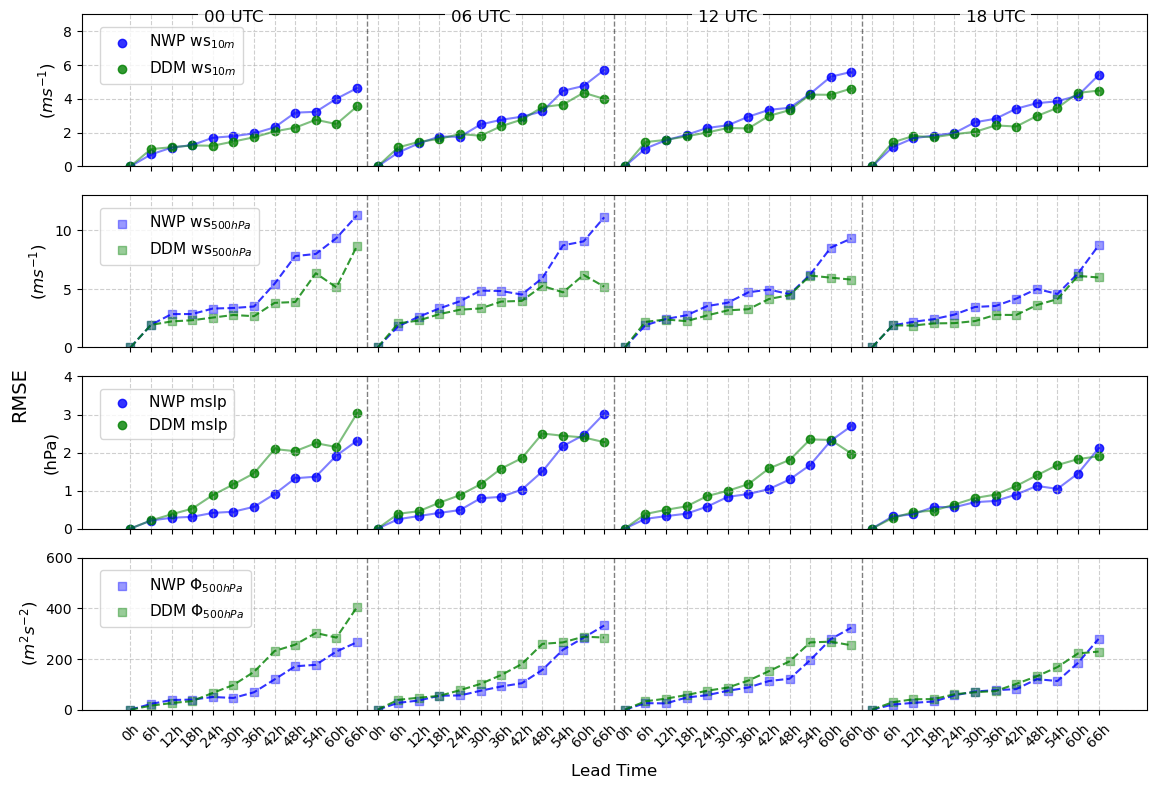

In [57]:
def plot_rmse(RMSE_NWP, RMSE_DDM, labels, labels_semplified, times_ticks, 
              y_max, ax=None, show_xlabels=False, show_times=False,
              ylabel="", color_NWP='blue', color_DDM='green',
              line_style='-', marker_NWP='o', marker_DDM='o', 
              alpha_line=0.5, alpha_marker=0.7, include_analysis=False,
              nwp_label="NWP", ddm_label="DDM"):
    """
    Unified function to plot RMSE comparison between NWP and DDM.
    """
    RMSE_NWP_ext, RMSE_DDM_ext = extend_rmse_arrays(RMSE_NWP, RMSE_DDM)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 2.5))  # More squeezed vertically
    
    segments = [(0, 12), (12, 24), (24, 36), (36, 48)]
    
    # Plot lines for each segment
    for start, end in segments:
        ax.plot(labels[start:end], RMSE_NWP_ext[start:end], color=color_NWP,
                linestyle=line_style, alpha=alpha_line)
        ax.plot(labels[start:end], RMSE_DDM_ext[start:end], color=color_DDM,
                linestyle=line_style, alpha=alpha_line)
    
    # Plot scatter points with proper labels
    ax.scatter(labels, RMSE_NWP_ext, color=color_NWP, label=nwp_label, 
               marker=marker_NWP, alpha=alpha_marker)
    ax.scatter(labels, RMSE_DDM_ext, color=color_DDM, label=ddm_label, 
               marker=marker_DDM, alpha=alpha_marker)
    
    # Highlight Analysis points if requested
    if include_analysis:
        gt_indices = [0, 12, 24, 36]
        ax.scatter([labels[i] for i in gt_indices],
                   [RMSE_NWP_ext[i] for i in gt_indices],
                   color='black', label="Analysis", marker="o", zorder=5)
    
    # Set y-axis label with units
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_ylim(0, y_max)
    
    # Configure x-axis labels
    if show_xlabels:
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels_semplified, rotation=45, ha="center", fontsize=10)
    else:
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels([''] * len(labels))
    
    ax.tick_params(axis="x", pad=5)
    ax.tick_params(axis="y", labelsize=10)
    ax.grid(True, linestyle="--", alpha=0.6)
    
    # Add vertical lines
    vertical_lines = [11.5, 23.5, 35.5]
    for line in vertical_lines:
        ax.axvline(x=line, color='black', linestyle='--', linewidth=1, alpha=0.5)
    
    # Add time annotations only for the first plot
    if show_times:
        text_positions = [5, 17, 29, 42]
        for i, txt in enumerate(times_ticks):
            ax.text(text_positions[i], y_max * 0.95, txt, ha='center', fontsize=12,
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    ax.legend(fontsize=11, loc='upper left', bbox_to_anchor=(0.01, 0.97))
    
    return ax

# Create the 4 subplots with more vertical squeezing
fig, axes = plt.subplots(4, 1, figsize=(12, 8))  # Reduced height from 10 to 8

# Add the main y-label for all plots
fig.text(0.04, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=14)

# Plot 1: ws10m
plot_rmse(
    RMSE_NWP=RMSE_ws_NWP_surface,
    RMSE_DDM=RMSE_ws_DDM_surface,
    labels=labels_for_graph_comparison,
    labels_semplified=labels_semplified,
    times_ticks=times_ticks_05,
    y_max=9,
    ax=axes[0],
    show_times=True,  # Show times only on first plot
    ylabel=r"($ms^{-1}$)",
    color_NWP='blue',
    color_DDM='green',
    line_style='-',
    marker_NWP='o',
    marker_DDM='o',
    alpha_line=0.5,
    alpha_marker=0.8,
    include_analysis=False,
    nwp_label=r"NWP ws$_{10m}$",
    ddm_label=r"DDM ws$_{10m}$"
)

# Plot 2: ws500hPa
plot_rmse(
    RMSE_NWP=RMSE_ws_NWP_500hPa,
    RMSE_DDM=RMSE_ws_DDM_500hPa,
    labels=labels_for_graph_comparison,
    labels_semplified=labels_semplified,
    times_ticks=times_ticks_05,
    y_max=13,
    ax=axes[1],
    show_times=False,
    ylabel=r"($ms^{-1}$)",
    color_NWP='blue',
    color_DDM='green',
    line_style='--',
    marker_NWP='s',
    marker_DDM='s',
    alpha_line=0.8,
    alpha_marker=0.4,
    include_analysis=False,
    nwp_label=r"NWP ws$_{500hPa}$",
    ddm_label=r"DDM ws$_{500hPa}$"
)

# Plot 3: mslp
plot_rmse(
    RMSE_NWP=RMSE_mslp_NWP_surface,
    RMSE_DDM=RMSE_mslp_DDM_surface,
    labels=labels_for_graph_comparison,
    labels_semplified=labels_semplified,
    times_ticks=times_ticks_05,
    y_max=4,
    ax=axes[2],
    show_times=False,
    ylabel=r"(hPa)",
    color_NWP='blue',
    color_DDM='green',
    line_style='-',
    marker_NWP='o',
    marker_DDM='o',
    alpha_line=0.5,
    alpha_marker=0.8,
    include_analysis=False,
    nwp_label="NWP mslp",
    ddm_label="DDM mslp"
)

# Plot 4: Phi500hPa
plot_rmse(
    RMSE_NWP=RMSE_Phi_NWP_500hPa,
    RMSE_DDM=RMSE_Phi_DDM_500hPa,
    labels=labels_for_graph_comparison,
    labels_semplified=labels_semplified,
    times_ticks=times_ticks_05,
    y_max=600,
    ax=axes[3],
    show_times=False,
    show_xlabels=True,  # Show xlabels only on last plot
    ylabel=r"($m^2s^{-2}$)",
    color_NWP='blue',
    color_DDM='green',
    line_style='--',
    marker_NWP='s',
    marker_DDM='s',
    alpha_line=0.8,
    alpha_marker=0.4,
    include_analysis=False,
    nwp_label=r"NWP $\Phi_{500hPa}$",
    ddm_label=r"DDM $\Phi_{500hPa}$"
)

# Add xlabel to the bottom of the last plot
axes[3].set_xlabel('Lead Time', fontsize=12, labelpad=10)

plt.tight_layout()
plt.subplots_adjust(left=0.1)  # Adjust left margin to make space for the y-label

# Save the figure in high resolution
save_path = ''
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()